In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
##drop month day and year
df.drop(['day','month','year'],axis=1,inplace=True)

In [11]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [12]:
df['Classes']=df['Classes'].astype(str)
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [13]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [14]:
## Independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [15]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [16]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [17]:
##Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [18]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [19]:
## Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.659120,-0.313004,-0.329720,0.701060,0.502747,0.393587,0.630473,0.476795,0.565026,0.299316
RH,-0.659120,1.000000,0.312190,0.245762,-0.670875,-0.399709,-0.227840,-0.703401,-0.346836,-0.491651,-0.435075
Ws,-0.313004,0.312190,1.000000,0.160958,-0.227260,-0.019928,0.045396,-0.017229,0.004554,-0.120561,-0.198738
Rain,-0.329720,0.245762,0.160958,1.000000,-0.555931,-0.275293,-0.287197,-0.348926,-0.285114,-0.390323,-0.046784
FFMC,0.701060,-0.670875,-0.227260,-0.555931,1.000000,0.592479,0.493368,0.746844,0.575405,0.782283,0.237565
DMC,0.502747,-0.399709,-0.019928,-0.275293,0.592479,1.000000,0.882414,0.679640,0.984318,0.583017,0.205296
DC,0.393587,-0.227840,0.045396,-0.287197,0.493368,0.882414,1.000000,0.513896,0.949592,0.485008,-0.085764
ISI,0.630473,-0.703401,-0.017229,-0.348926,0.746844,0.679640,0.513896,1.000000,0.637470,0.742329,0.288159
BUI,0.476795,-0.346836,0.004554,-0.285114,0.575405,0.984318,0.949592,0.637470,1.000000,0.567145,0.100737
Classes,0.565026,-0.491651,-0.120561,-0.390323,0.782283,0.583017,0.485008,0.742329,0.567145,1.000000,0.200545


<Axes: >

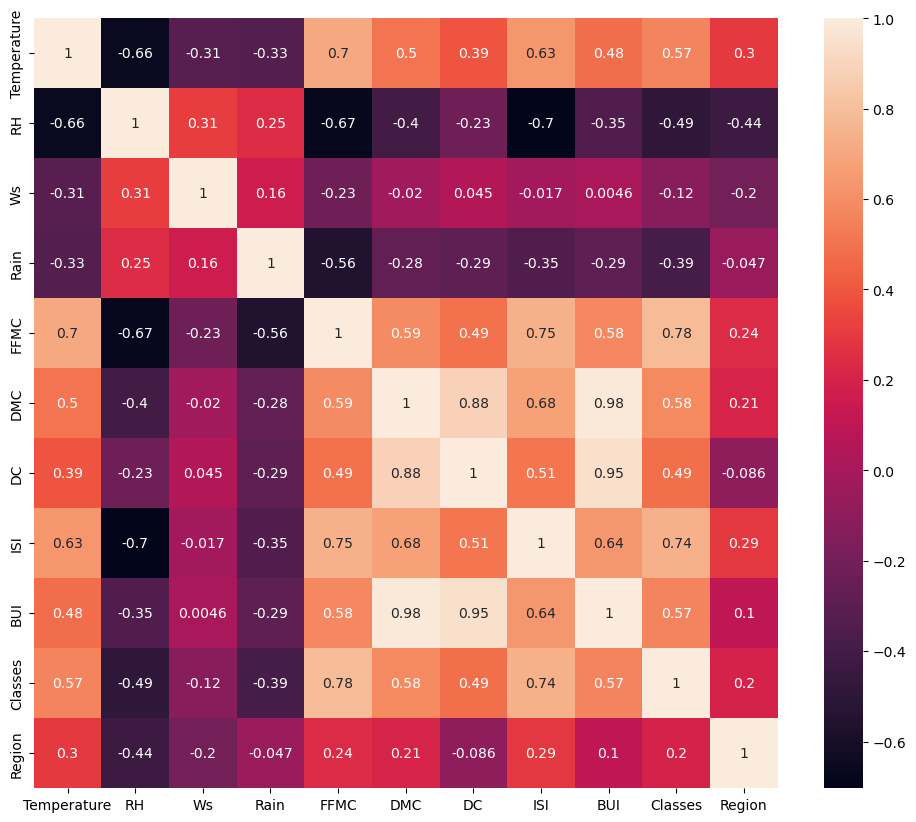

In [20]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [21]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [22]:
## threshhold --Domain expertise
corr_features=correlation(X_train,0.85)

In [23]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [24]:
## Feature Scaling or Standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

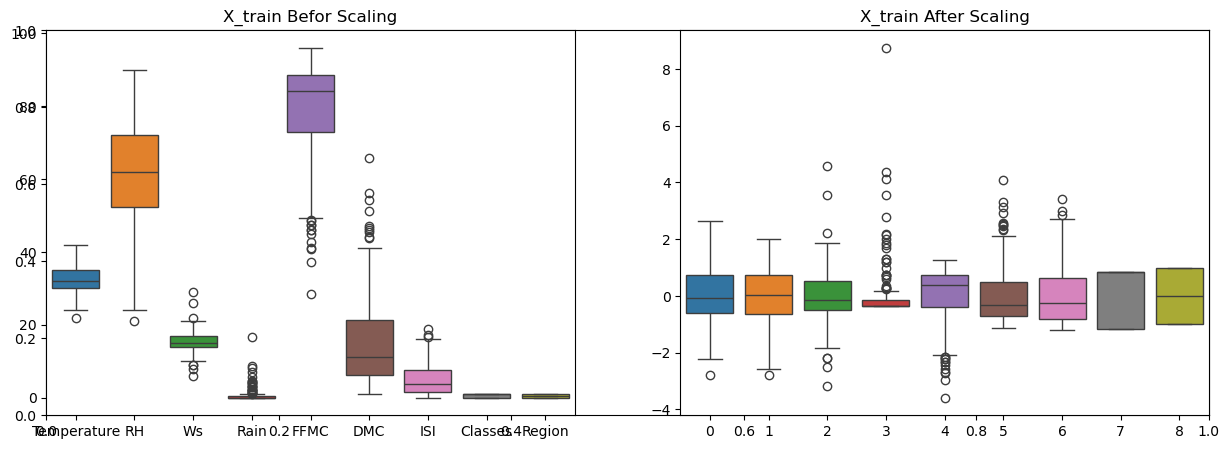

In [25]:
## Box plots to understand to understand effect of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1 ,2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Befor Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Linear Regression

Mean Absolute error : 1.0487342132392334
R2 score 0.9662501523861574


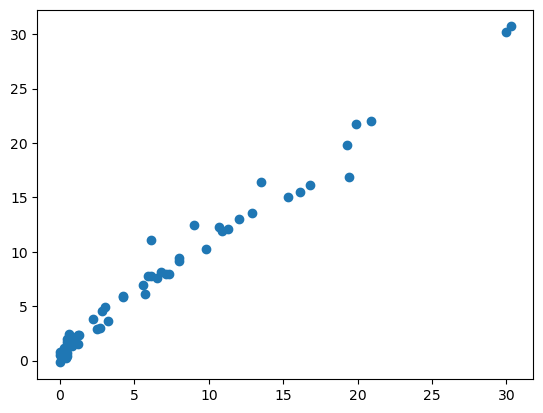

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error :", mae)
print('R2 score',score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean Absolute error : 1.6018699921284112
R2 score 0.9366731786416922


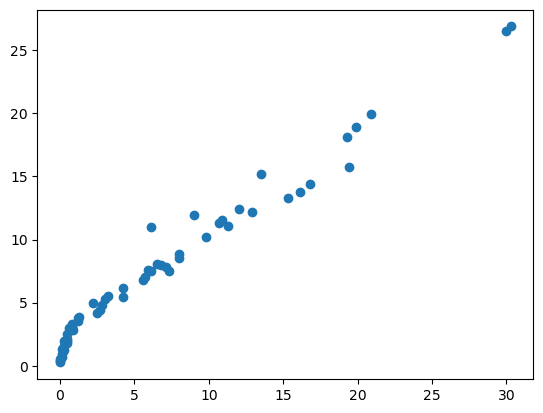

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error :", mae)
print('R2 score',score)
plt.scatter(y_test,y_pred)

# Ridge Regression

Mean Absolute error : 1.054248576921345
R2 score 0.9656489392891391


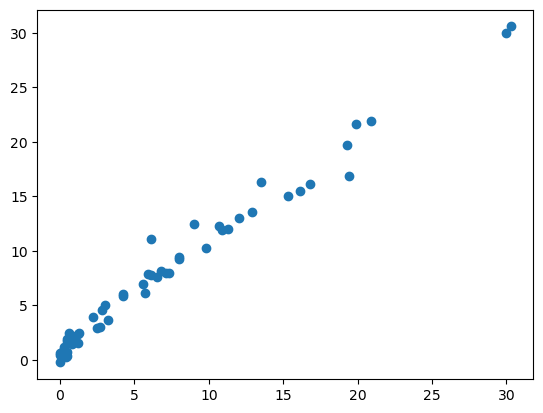

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error :", mae)
print('R2 score',score)
plt.scatter(y_test,y_pred)

Mean Absolute error : 1.054248576921345
R2 score 0.9656489392891391


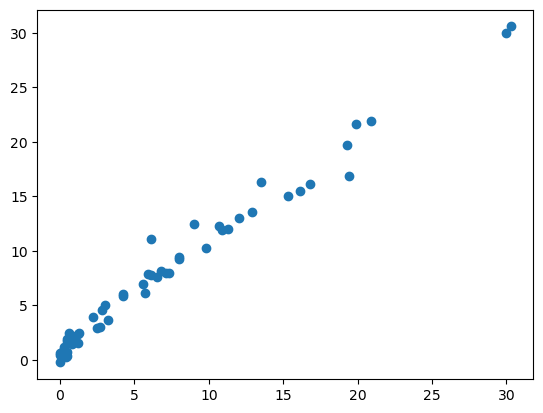

In [29]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error :", mae)
print('R2 score',score)

In [30]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [31]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elasticnet Regression

Mean Absolute error : 2.197125800495784
R2 score 0.8701110583291066


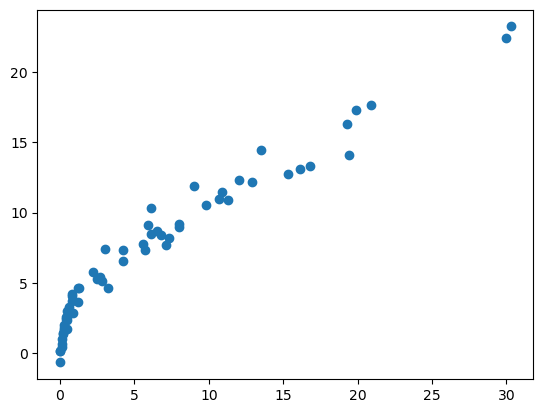

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred=elasticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error :", mae)
print('R2 score',score)
plt.scatter(y_test,y_pred)

Mean Absolute error : 1.089865309638675
R2 score 0.9637997456368971


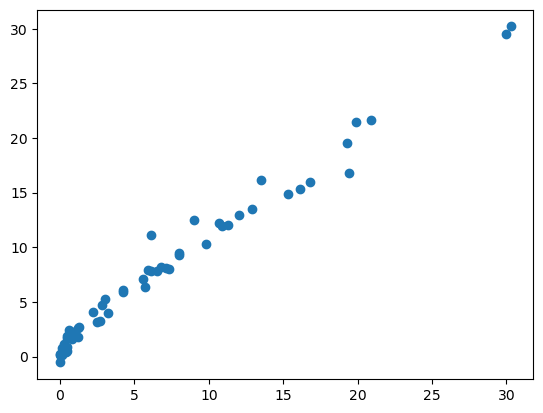

In [33]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred=elasticnetcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error :", mae)
print('R2 score',score)
plt.scatter(y_test,y_pred)

In [34]:
elasticnetcv.alphas_

array([13.61572526, 12.69807094, 11.84226346, 11.04413454, 10.29979683,
        9.605625  ,  8.95823802,  8.35448276,  7.79141859,  7.26630305,
        6.77657854,  6.31985983,  5.89392243,  5.49669179,  5.12623316,
        4.7807422 ,  4.45853617,  4.15804576,  3.87780739,  3.61645615,
        3.37271911,  3.14540913,  2.93341908,  2.73571645,  2.55133832,
        2.37938666,  2.21902396,  2.06946917,  1.92999388,  1.79991875,
        1.67861025,  1.56547754,  1.45996959,  1.36157253,  1.26980709,
        1.18422635,  1.10441345,  1.02997968,  0.9605625 ,  0.8958238 ,
        0.83544828,  0.77914186,  0.72663031,  0.67765785,  0.63198598,
        0.58939224,  0.54966918,  0.51262332,  0.47807422,  0.44585362,
        0.41580458,  0.38778074,  0.36164562,  0.33727191,  0.31454091,
        0.29334191,  0.27357165,  0.25513383,  0.23793867,  0.2219024 ,
        0.20694692,  0.19299939,  0.17999187,  0.16786102,  0.15654775,
        0.14599696,  0.13615725,  0.12698071,  0.11842263,  0.11

## Cross validation Lasso

In [35]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

In [36]:
lassocv.alpha_


0.038957092934641474

In [37]:
lassocv.alphas_

array([6.80786263, 6.34903547, 5.92113173, 5.52206727, 5.14989842,
       4.8028125 , 4.47911901, 4.17724138, 3.89570929, 3.63315153,
       3.38828927, 3.15992992, 2.94696122, 2.74834589, 2.56311658,
       2.3903711 , 2.22926809, 2.07902288, 1.9389037 , 1.80822808,
       1.68635956, 1.57270457, 1.46670954, 1.36785823, 1.27566916,
       1.18969333, 1.10951198, 1.03473459, 0.96499694, 0.89995937,
       0.83930512, 0.78273877, 0.72998479, 0.68078626, 0.63490355,
       0.59211317, 0.55220673, 0.51498984, 0.48028125, 0.4479119 ,
       0.41772414, 0.38957093, 0.36331515, 0.33882893, 0.31599299,
       0.29469612, 0.27483459, 0.25631166, 0.23903711, 0.22292681,
       0.20790229, 0.19389037, 0.18082281, 0.16863596, 0.15727046,
       0.14667095, 0.13678582, 0.12756692, 0.11896933, 0.1109512 ,
       0.10347346, 0.09649969, 0.08999594, 0.08393051, 0.07827388,
       0.07299848, 0.06807863, 0.06349035, 0.05921132, 0.05522067,
       0.05149898, 0.04802813, 0.04479119, 0.04177241, 0.03895

In [38]:
lassocv.mse_path_

array([[39.68176375, 66.12198634, 60.95324321, 56.94414516, 49.68019702],
       [34.72136703, 62.43346708, 57.03433541, 50.80684634, 44.90295968],
       [30.40374708, 56.25374716, 52.7010811 , 45.52072731, 40.72774111],
       [26.64545698, 50.82417561, 46.6612224 , 40.97143057, 37.07749059],
       [23.37377314, 46.05073593, 40.95211972, 36.15480384, 33.15437073],
       [20.52560509, 41.29406133, 35.97043928, 31.73695975, 29.18074418],
       [18.0459205 , 35.91466398, 31.62259231, 27.92848322, 25.71299574],
       [15.88689204, 31.25433645, 27.82703471, 24.64737038, 22.68541271],
       [14.00685364, 27.21802576, 24.51277529, 21.82359275, 20.04230078],
       [12.36972839, 23.72330696, 21.61806004, 19.3951945 , 17.73383205],
       [10.94395417, 20.69856836, 19.08895439, 17.30881811, 15.71706724],
       [ 9.70212938, 18.0815978 , 16.87866023, 15.51818141, 13.9546166 ],
       [ 8.620413  , 15.81794077, 14.94636695, 13.98314736, 12.41391966],
       [ 7.67806131, 13.8615502 , 13.2

Mean Absolute error : 1.0683518230205225
R2 score 0.9661434479528475


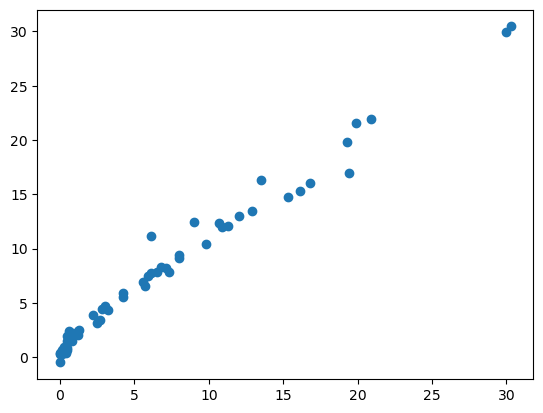

In [39]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error :", mae)
print('R2 score',score)

In [40]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))


In [42]:
scaler


StandardScaler()

In [43]:
ridge

Ridge()